# Assignment 1

## Question `2` (Decision Trees)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

This assignment will have you working and experimenting with decision trees. Initially, you will be required to implement a decision tree classifier by choosing thresholds based on various impurity measures and reporting the scores. Later, you can experiment with the `scikit-learn` implementation of decision trees, and how various other parameters can be leveraged for better performance.

The dataset is a very simple one, the [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It has 5 columns, the first 4 are the features, and the last one is the class label. The features are the variance, skewness, curtosis and entropy of the [wavelet transformed](https://en.wikipedia.org/wiki/Wavelet_transform) image of the banknote. The class label is 1 if the banknote is authentic, and 0 if it is forged. The data is present in `bankAuth.txt`. There are a total of 1372 samples in the dataset.

### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Impurity Measures

Decision trees are only as good as the impurity measure used to choose the best split. In this section, you will be required to implement the following impurity measures and use them to build a decision tree classifier.

1. Gini Index
2. Entropy
3. Misclassification Error

Write functions that calculate the impurity measures for a given set of labels. The functions should take in a list of labels and return the impurity measure.

In [4]:
def entropy(self,y):
        
    class_labels,count_values=np.unique(y,return_counts=True)
    entropy=0
    n=len(y)
    for i in count_values:
        p_cls=i/n
        entropy += -p_cls*np.log2(p_cls)
    return entropy
    
def gini_index(self,y):
    class_labels,count_values=np.unique(y,return_counts=True)
    gini=1
    n=len(y)
    for i in count_values:
        p_cls=i/n
        gini += p_cls**2
    return 1-gini
    
def misclassification_error(self,y):
    class_labels,count_values=np.unique(y,return_counts=True)
    max=np.max(count_values)
    return 1-(max/len(y))

### Decision Tree

Fit a decision tree using any one of the above impurity measures with a depth of 3. This means you will have eight leaf nodes and seven internal nodes. Report the threshold values at each internal node and the impurity measure at the final leaf node with the label. Also report the accuracy of the classifier on the training and test data (instructions for splitting the data will be given in the end).

In [25]:
class Node():
    def __init__(self,feature_index=None,threshold=None,left=None,right=None,info_gain=None,value=None):
        
        self.feature_index=feature_index
        self.threshold=threshold
        self.left=left
        self.right=right
        self.info_gain=info_gain
        self.value=value 
        


class Decision_Tree_Classifier():
    
    def __init__(self,mode="entropy",min_samples_split=2,max_depth=3):
        self.root=None
        self.min_samples_split=min_samples_split 
        self.max_depth=max_depth
        self.mode=mode
    
    
    def build_tree(self,data_set,curr_depth=0):
        samples,n_features=np.shape(data_set[:,:-1])
        if samples>=self.min_samples_split and curr_depth<self.max_depth:
            best_split=self.get_best_split(data_set,samples,n_features)
            if best_split["info_gain"] > 0:
                left_subtree,right_subtree = self.build_tree(best_split["data_left"],curr_depth + 1),self.build_tree(best_split["data_right"],curr_depth + 1)
                print("\n\nInternal Node depth-",curr_depth)
                print("feature - ",best_split["feature_index"])
                print("threshold -",best_split["threshold"])
                return Node(best_split["feature_index"],best_split["threshold"],
                            left_subtree,right_subtree,best_split["info_gain"])
        print("\n\nTerminal Node depth-",curr_depth)
        if self.mode=='gini':
            print("Gini Index-",self.gini_index(data_set[:,-1]))
        elif self.mode=='entropy':
            print("Entropy -",self.entropy(data_set[:,-1]))
        else:
            print("Misclassification Error",self.misclassification_error(data_set[:,-1]))
        Y = list(data_set[:,-1])
        
        return Node(value=max(Y, key=Y.count))
    
    def fit(self, X, Y):
        self.root = self.build_tree(np.concatenate((X, Y), axis=1))
        
    def predict(self, X):
        return [self.make_prediction(x, self.root) for x in X]
    
    def make_prediction(self,x,tree):
        if tree.value!=None:
            return tree.value
        if x[tree.feature_index] <= tree.threshold:
            return self.make_prediction(x,tree.left)
        return self.make_prediction(x,tree.right)
    
    
    def get_best_split(self,data_set,num_samples,num_features):
        best_split={}
        max_info_gain=-float("inf")
        for f_i in range(num_features):
            feature_values = data_set[:,f_i]
            for threshold in np.unique(feature_values):
                data_set_l,data_set_r=self.split(data_set,f_i,threshold)
                if len(data_set_l)>0 and len(data_set_r)>0:
                    info_gain=self.get_info_gain(data_set[:,-1],data_set_l[:,-1],data_set_r[:,-1])
                    if info_gain > max_info_gain :
                        max_info_gain = info_gain
                        best_split["feature_index"] = f_i
                        best_split["threshold"] = threshold
                        best_split["data_left"] = data_set_l
                        best_split["data_right"] = data_set_r
                        best_split["info_gain"] = info_gain
        return best_split
                        
                            
                        
                        
                
    def get_info_gain(self,parent,l_child,r_child):
        
        if self.mode == "gini":
            return self.gini_index(parent)-(((len(l_child)/len(parent))*self.gini_index(l_child))+((len(r_child)/len(parent))*self.gini_index(r_child)))
        elif self.mode == "entropy":
            return self.entropy(parent)-((len(l_child)/len(parent))*self.entropy(l_child)+(len(r_child)/len(parent))*self.entropy(r_child))
        else:
            return self.misclassification_error(parent)-((len(r_child)/len(parent))*self.misclassification_error(l_child)+(len(r_child)/len(parent))*self.misclassification_error(r_child))
    def split(self,dataset,feature_index,threshold):
        return np.array([row for row in dataset if row[feature_index]<=threshold]), np.array([row for row in dataset if row[feature_index]>threshold])        
            
    def entropy(self,y):
        
        class_labels,count_values=np.unique(y,return_counts=True)
        entropy=0
        n=len(y)
        for i in count_values:
            p_cls=i/n
            entropy += -p_cls*np.log2(p_cls)
        return entropy
    
    def gini_index(self,y):
        class_labels,count_values=np.unique(y,return_counts=True)
        gini=0
        n=len(y)
        for i in count_values:
            p_cls=i/n
            gini += p_cls**2
        return 1-gini
    
    def misclassification_error(self,y):
        class_labels,count_values=np.unique(y,return_counts=True)
        max=np.max(count_values)
        return 1-(max/len(y))

### `sklearn` Decision Tree Experiments

1. Scikit-learn has two decision tree implementations: [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). 

When would you use one over the other? What would you use in the case of the banknote authentication dataset? Explain the changes that need to be made in the dataset to use the other implementation.

2. Fit a decision tree to the training set. Change various parameters and compare them to one another. Mainly try and experiment with the `criterion`, `max_depth` and `min_samples_split` parameters. Report the accuracy on the training and test set for each of the experiments while varying the parameters for comparison purposes.

3. Plot your trees !! (optional) (for visualization)

```python
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None
```

1. For a classification problem we will use Decision Tree Classifier while for doing a prediction based on current data set we will use Decision tree regressor
In case of bank Authentication dataset we will use Decision tree Classifier as the problem is to classify the note is forged or not
In order to use the other one instead of predicting a class label if we have to predict the probability that this note is forged or not in that case we can use Decision tree regressor

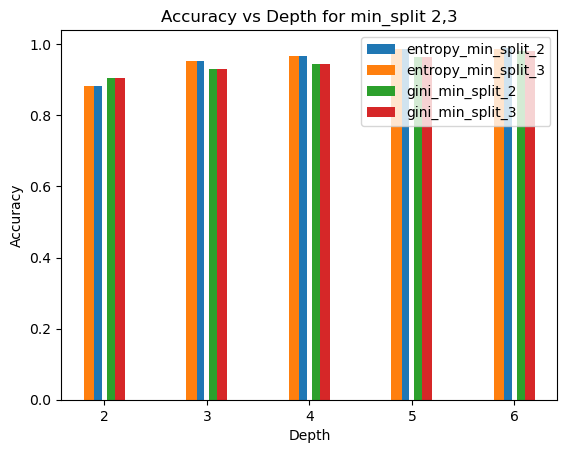

In [48]:
# your code here
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(random_state=42)
df=pd.read_csv("bankAuth.txt",names=['variance', 'skewness', 'curtosis','entropy','class'])
X=df.to_numpy()[:,:-1]
Y=df.to_numpy()[:,-1].reshape(-1,1)
clf.fit(X,Y)

arr=np.empty(shape=(5,2))

for i in range(2,7):
      for j  in range(2,4):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
            classifier=clf = DecisionTreeClassifier(random_state=42,criterion="entropy",max_depth=i,min_samples_split=j)
            classifier.fit(X_train,y_train)
            
            y_pred=classifier.predict(X_test)
            arr[i-2][j-2]=accuracy_score(y_test, y_pred)
arr1=np.empty(shape=(5,2))

for i in range(2,7):
      for j  in range(2,4):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
            classifier=clf = DecisionTreeClassifier(random_state=42,criterion="gini",max_depth=i,min_samples_split=j)
            classifier.fit(X_train,y_train)
            
            y_pred=classifier.predict(X_test)
            arr1[i-2][j-2]=accuracy_score(y_test, y_pred)
  

X=[i for i in range(2,7)]   
X_axis = np.arange(len(X))
bar1=plt.bar(X_axis-0.075,arr.transpose()[0], 0.1, label = 'entropy_min_split_2')
bar2=plt.bar(X_axis-0.15,arr.transpose()[1], 0.1, label = 'entropy_min_split_3')
bar3=plt.bar(X_axis+0.075,arr1.transpose()[0], 0.1, label = 'gini_min_split_2')
bar4=plt.bar(X_axis+0.15,arr1.transpose()[1], 0.1, label = 'gini_min_split_3')

plt.xlabel("Depth")
plt.ylabel('Accuracy')
plt.title("Accuracy vs Depth for min_split 2,3")
  
plt.xticks(X_axis,X)

plt.legend( (bar1, bar2, bar3,bar4), ('entropy_min_split_2', 'entropy_min_split_3', 'gini_min_split_2','gini_min_split_3') )

plt.show()
def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    

    plt.figure(figsize=(30,20))
    plot_tree(clf, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None


### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [7]:
df=pd.read_csv("bankAuth.txt",names=['variance', 'skewness', 'curtosis','entropy','class'])
df.describe(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


(          variance     skewness     curtosis      entropy        class
 count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
 mean      0.433735     1.922353     1.397627    -1.191657     0.444606
 std       2.842763     5.869047     4.310030     2.101013     0.497103
 min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
 25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
 50%       0.496180     2.319650     0.616630    -0.586650     0.000000
 75%       2.821475     6.814625     3.179250     0.394810     1.000000
 max       6.824800    12.951600    17.927400     2.449500     1.000000,
 None)

In [8]:
X=df.to_numpy()[:,:-1]
Y=df.to_numpy()[:,-1].reshape(-1,1)

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    

### Denouement

Use this place to report all comparisons and wrap up the calls to the functions written above.

In [29]:
def get_accuracy(X,Y,c):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    classifier=clf = DecisionTreeClassifier(random_state=42,criterion=c,max_depth=3,min_samples_split=2)
    classifier.fit(X_train,y_train)
    
    y_pred=classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)

def get_accuracy_custom(X,Y,c):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    classifier=clf = Decision_Tree_Classifier(mode=c,max_depth=3,min_samples_split=2)
    classifier.fit(X_train,y_train)
    
    y_pred=classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)
    
criterion = ['gini', 'entropy']
acc_1=[]
for i in criterion:
    acc_1.append(get_accuracy(X,Y,i))
    
criterion_1 = ['gini', 'entropy','misclassification_error']
acc_2=[]
for i in criterion_1:
    acc_2.append(get_accuracy_custom(X,Y,i))





Terminal Node depth- 3
Gini Index- 0.06482376561570491


Terminal Node depth- 3
Gini Index- 0.40816326530612246


Internal Node depth- 2
feature -  0
threshold - -0.55008


Terminal Node depth- 3
Gini Index- 0.0


Terminal Node depth- 3
Gini Index- 0.0


Internal Node depth- 2
feature -  0
threshold - -5.1661


Internal Node depth- 1
feature -  1
threshold - 7.6584


Terminal Node depth- 3
Gini Index- 0.0


Terminal Node depth- 3
Gini Index- 0.0


Internal Node depth- 2
feature -  0
threshold - 2.2279


Terminal Node depth- 3
Gini Index- 0.3106508875739644


Terminal Node depth- 3
Gini Index- 0.017491349480968754


Internal Node depth- 2
feature -  0
threshold - 1.5631


Internal Node depth- 1
feature -  2
threshold - -4.4987


Internal Node depth- 0
feature -  0
threshold - 0.31803


Terminal Node depth- 3
Entropy - 0.0


Terminal Node depth- 3
Entropy - 0.5699613760403499


Internal Node depth- 2
feature -  2
threshold - 3.0141


Terminal Node depth- 3
Entropy - 0.222284830685688



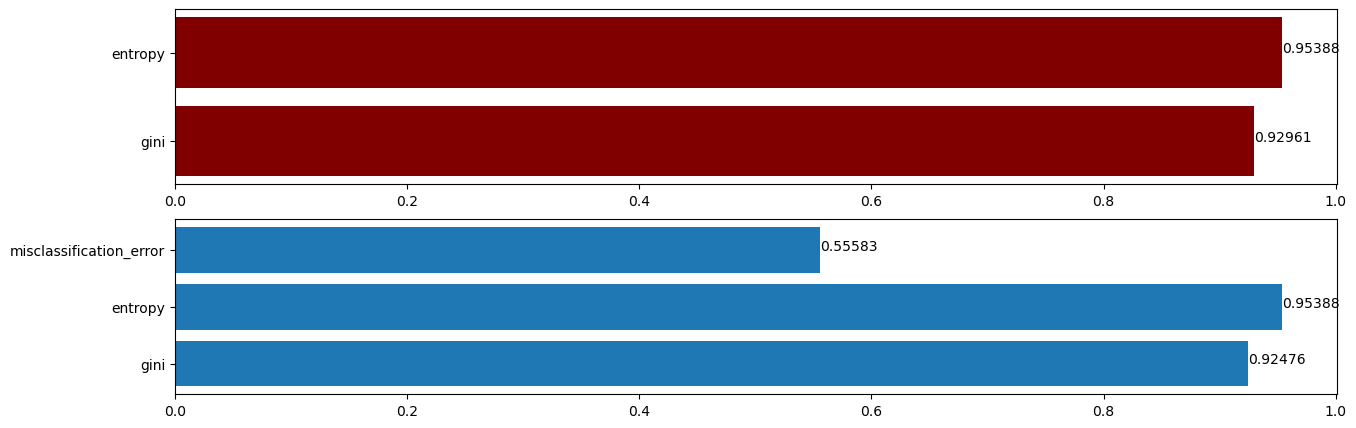

In [30]:
fig, axs = plt.subplots(2,1,figsize=(15,5))
 # row 1, col 2 index 1
axs[0].barh(criterion, acc_1,color='maroon')

for index, value in enumerate(acc_1):
    axs[0].text(round(value,5), index,
             str(round(value,5)))


axs[1].barh(criterion_1, acc_2)
for index, value in enumerate(acc_2):
    axs[1].text(round(value,5), index,
             str(round(value,5)))


plt.show()